In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00


In [1]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

ModuleNotFoundError: No module named 'google_play_scraper'

In [4]:
#Android App Mobile JKN  from Google Play at
#https://play.google.com/store/apps/details?id=com.garmin.android.apps.connectmobile
#The apps ID found in the link after id=com.garmin.android.apps.connectmobile

#The apps name on Google Play titled: MobileJKN dari Pemerintah Indonesia (Kemenkes)
#Dated 3 March 2025 and N of reviews 787K

from google_play_scraper import app, Sort, reviews_all

garmin_connect_reviews = reviews_all(
    'com.garmin.android.apps.connectmobile',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [6]:
#Save Mobile JKN reviews into dataframe
garmin_connect_df = pd.DataFrame(np.array(garmin_connect_reviews),columns=['content'])
garmin_connect_df = garmin_connect_df.join(pd.DataFrame(garmin_connect_df.pop('content').tolist()))
garmin_connect_df.to_csv(r'garmin_connect_df', index=False)

In [7]:
garmin_connect_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b9cc36b3-70be-402d-a59b-e4302c0cf1de,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I've been using the app for my runs, hikes, an...",5,0,5.10,2025-03-05 03:59:29,None,NaT,5.10
1,17570b0e-bd10-4f5f-9311-41c8fd906eae,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,One of the best and most comprehensive app for...,5,0,5.9.1,2025-03-05 02:18:07,None,NaT,5.9.1
2,d5aec275-924a-47dc-9a56-7a5bef4aedc8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Everything you need in an activity tracker, an...",5,0,5.10,2025-03-05 01:18:05,None,NaT,5.10
3,f35af736-2180-4971-a186-792400c1fb85,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Accurate , reliable , and easy to use",5,0,5.10,2025-03-04 23:41:21,None,NaT,5.10
4,6c6a69c2-99b9-4be1-a9a0-8460bdd3a3fc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It needs mobile widgets,3,0,5.10,2025-03-04 22:44:30,None,NaT,5.10
...,...,...,...,...,...,...,...,...,...,...,...
125759,85a9bf60-113b-414e-b9ea-66aa351a06ca,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The edge 810 works well until I pair it with e...,4,3,1.0,2013-01-26 05:54:44,None,NaT,1.0
125760,270bbaa2-c43b-46e6-8dce-4d34408e2c8b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"As soon as I launch Connect on my phone, my 81...",2,0,1.0,2013-01-23 00:19:18,None,NaT,1.0
125761,762e5a73-d334-4b22-b873-8276133fe0f0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Why no power data for cycling!!!!,2,0,1.0,2013-01-20 08:17:42,None,NaT,1.0
125762,5591d191-91cd-4707-9716-c015f64fa6db,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I can't seem to send a prepared course (on the...,2,0,1.0,2013-01-12 07:02:08,None,NaT,1.0


In [8]:
garmin_connect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125764 entries, 0 to 125763
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              125764 non-null  object        
 1   userName              125764 non-null  object        
 2   userImage             125764 non-null  object        
 3   content               125742 non-null  object        
 4   score                 125764 non-null  int64         
 5   thumbsUpCount         125764 non-null  int64         
 6   reviewCreatedVersion  119067 non-null  object        
 7   at                    125764 non-null  datetime64[ns]
 8   replyContent          3817 non-null    object        
 9   repliedAt             3817 non-null    datetime64[ns]
 10  appVersion            119067 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 10.6+ MB


In [9]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
garmin_connect_df.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,"I've been using the app for my runs, hikes, an...",5,0,5.10,2025-03-05 03:59:29,None,NaT
1,One of the best and most comprehensive app for...,5,0,5.9.1,2025-03-05 02:18:07,None,NaT
2,"Everything you need in an activity tracker, an...",5,0,5.10,2025-03-05 01:18:05,None,NaT
3,"Accurate , reliable , and easy to use",5,0,5.10,2025-03-04 23:41:21,None,NaT
4,It needs mobile widgets,3,0,5.10,2025-03-04 22:44:30,None,NaT
...,...,...,...,...,...,...,...
125759,The edge 810 works well until I pair it with e...,4,3,1.0,2013-01-26 05:54:44,None,NaT
125760,"As soon as I launch Connect on my phone, my 81...",2,0,1.0,2013-01-23 00:19:18,None,NaT
125761,Why no power data for cycling!!!!,2,0,1.0,2013-01-20 08:17:42,None,NaT
125762,I can't seem to send a prepared course (on the...,2,0,1.0,2013-01-12 07:02:08,None,NaT


In [10]:
#Check number of reviews scores
garmin_connect_df['score'].value_counts()

,count
score,
5,71266
1,20709
4,18507
2,7965
3,7317


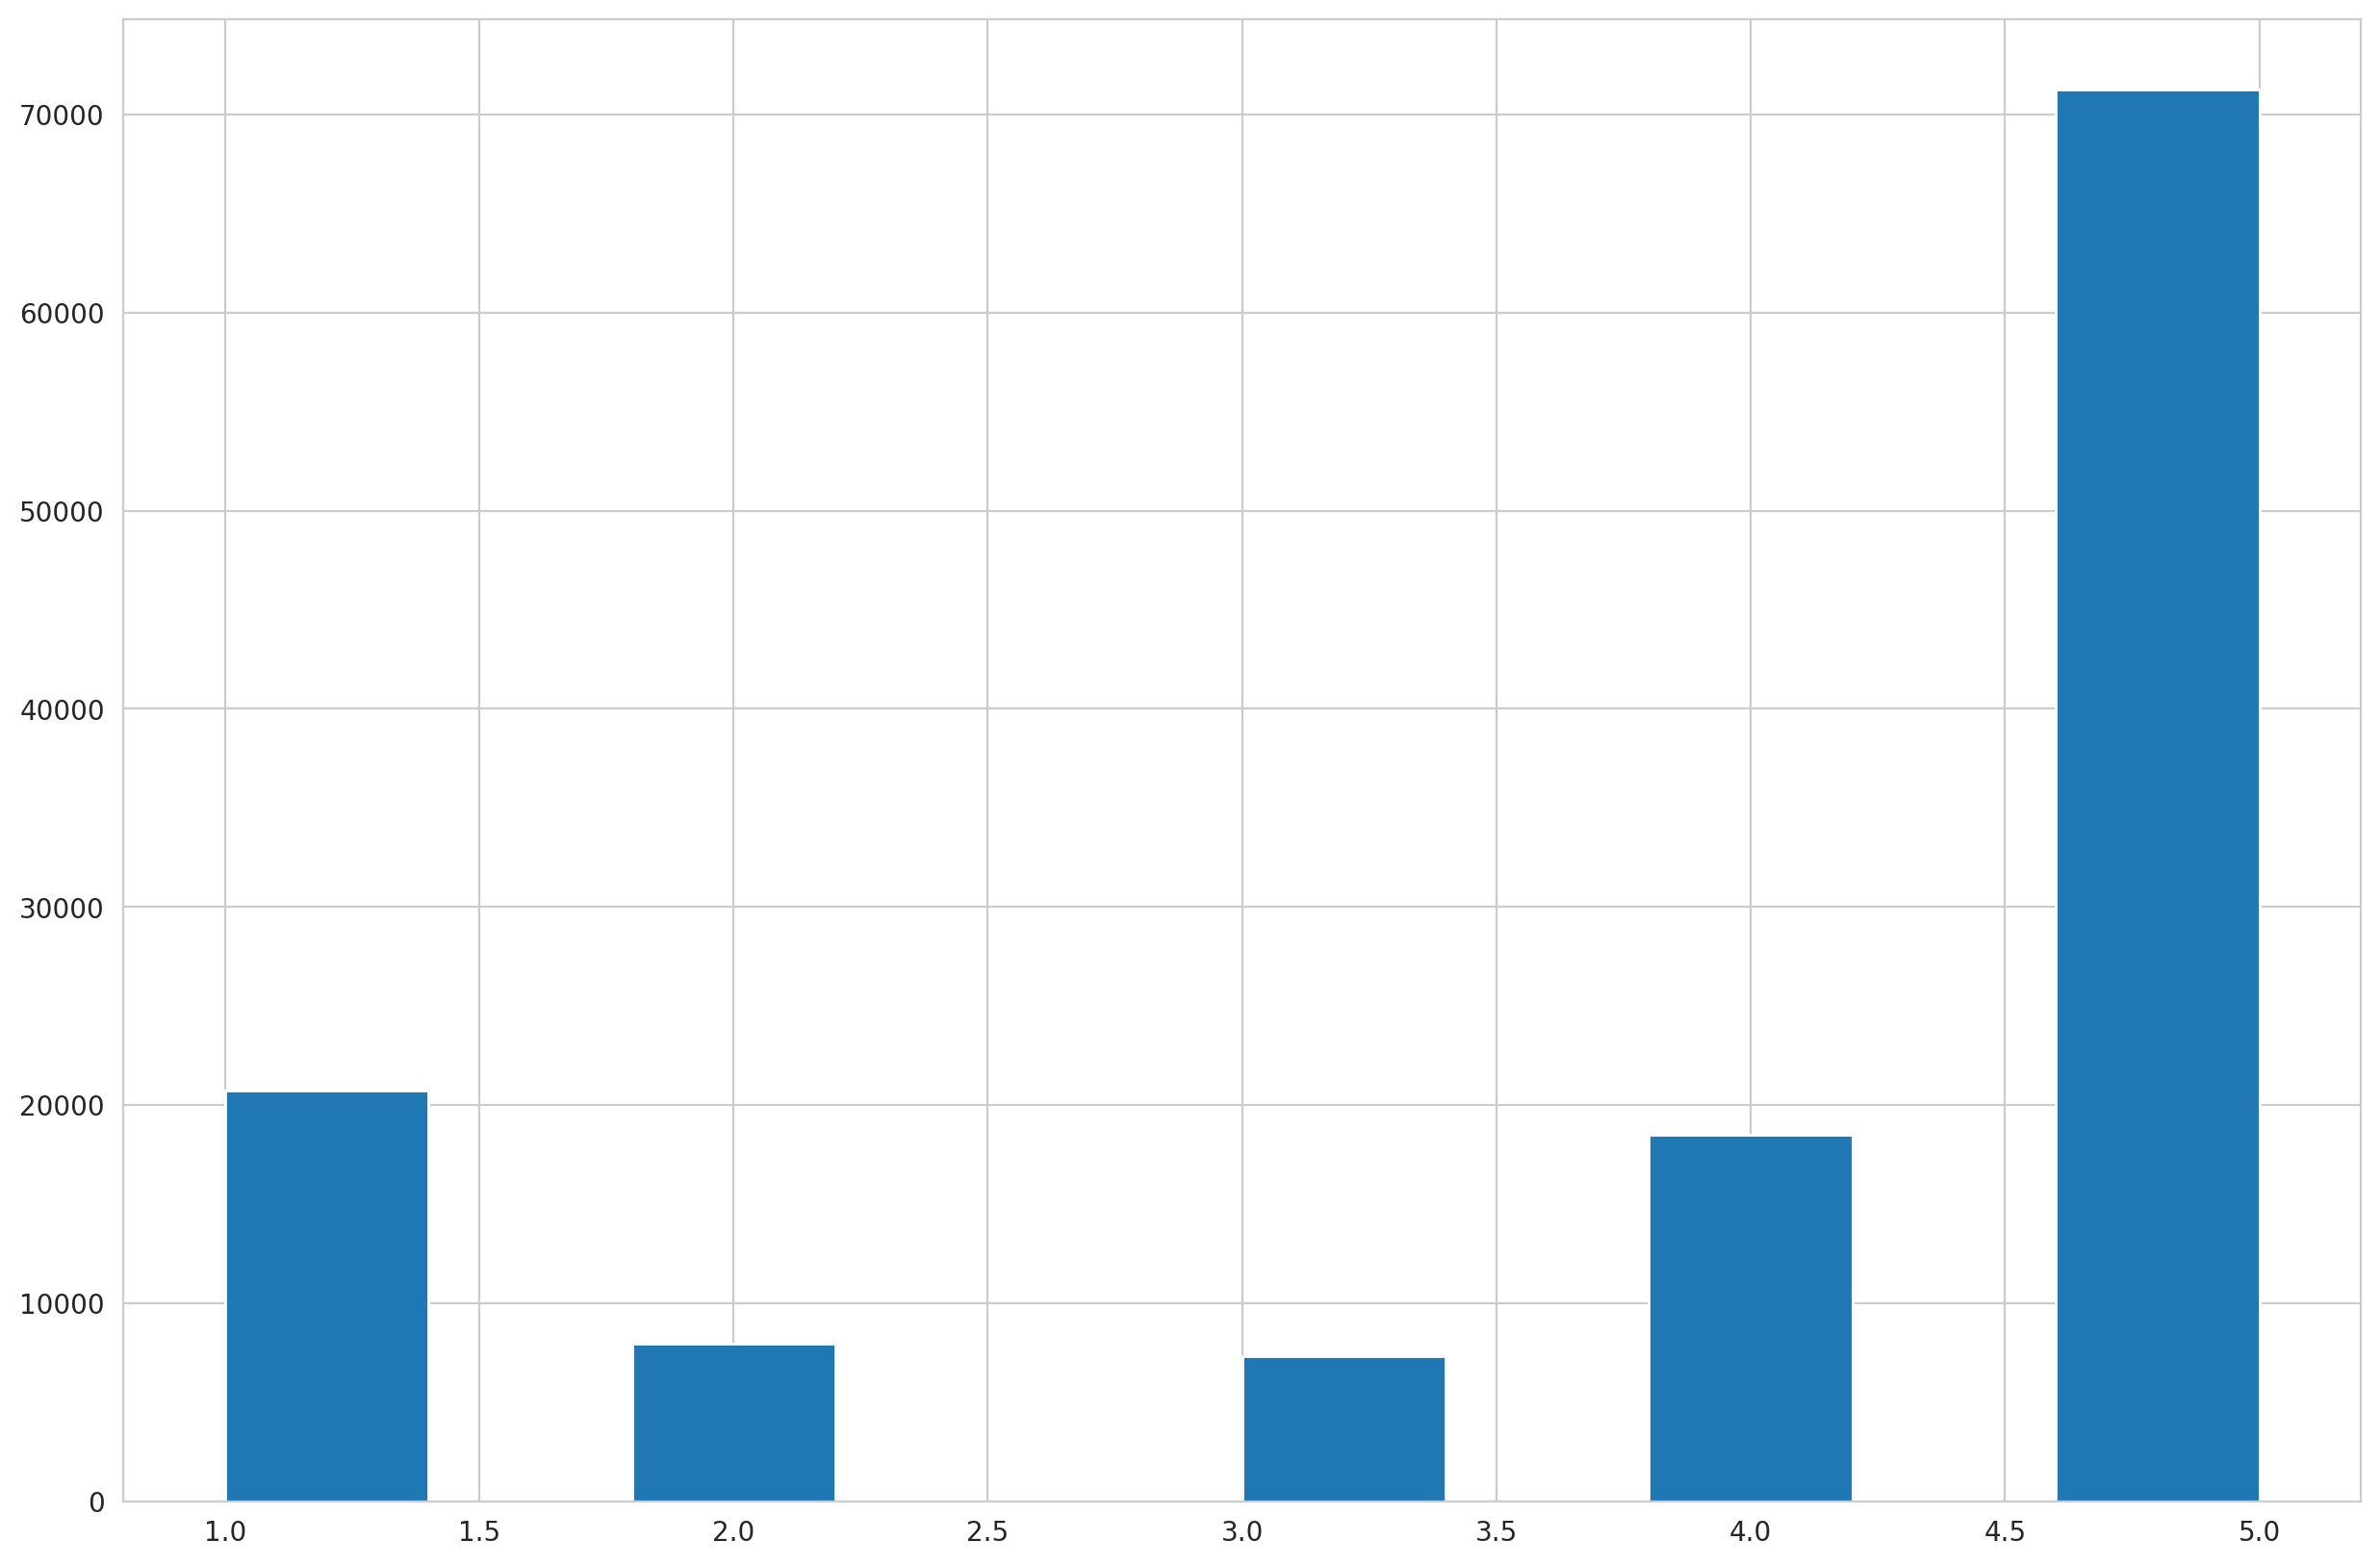

In [11]:
plt.hist(garmin_connect_df['score'])
plt.show()

In [12]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 5.3 MB/s eta 0:00:00


In [31]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
garmin_connect_df['sentiment_polarity'] = garmin_connect_df['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
garmin_connect_df['sentiment_subjective'] = garmin_connect_df['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [32]:
garmin_connect_df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,"using app runs, hikes, bike rides since 2023, really easy use read results, great futures, accurate, far good.",5,0.486667,0.763333
1,one best comprehensive app fitness.,5,1.000000,0.300000
2,"everything need activity tracker, more. love it!",5,0.562500,0.550000
3,"accurate , reliable , easy use",5,0.416667,0.733333
4,needs mobile widgets,3,0.000000,0.000000
...,...,...,...,...
125759,edge 810 works well pair either htc samsung nexus. 810 promptly shut (crash). sure that's unit problem garmin connect app. update: wrote garmin support advised factory reset edge device working mu...,4,0.500000,0.694444
125760,"soon launch connect phone, 810 turns off. happen connect running. worked first time though since.",2,0.250000,0.333333
125761,power data cycling!!!!,2,0.000000,0.000000
125762,"can't seem send prepared course (on garmin connect website), phone android device. ipad fine, there'snot even menu element it.",2,0.416667,0.500000


## Lowercasing

In [33]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
garmin_connect_df['content'] = garmin_connect_df['content'].astype(str)# Before lowercasing
# Before lowercasing
print(garmin_connect_df['content'][188])
print(garmin_connect_df['content'][1])
print(garmin_connect_df['content'][20100])

overall best choice. works 10 years. never disappointed
one best comprehensive app fitness.
app great, love device. works well, never crashes lots features. would like notified connections complete activity, like apps, seem option connect.


In [34]:
#Lowercase all reviews to see the difference
garmin_connect_df['content']= garmin_connect_df['content'].apply(lambda x: x.lower())
print(garmin_connect_df['content'][188])
print(garmin_connect_df['content'][1])
print(garmin_connect_df['content'][20100])

overall best choice. works 10 years. never disappointed
one best comprehensive app fitness.
app great, love device. works well, never crashes lots features. would like notified connections complete activity, like apps, seem option connect.


##Stopwords Removal
Indonesian Stopwords

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
english_stopwords = stopwords.words('english')

# Display first 20 stopwords
print(english_stopwords[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

garmin_connect_df['wordCount'] = [len(review.split()) for review in garmin_connect_df['content']]
garmin_connect_df['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in garmin_connect_df['content']]
garmin_connect_df['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in garmin_connect_df['content']]

In [38]:
garmin_connect_df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,"using app runs, hikes, bike rides since 2023, really easy use read results, great futures, accurate, far good.",5,0.486667,0.763333,18,0,7
1,one best comprehensive app fitness.,5,1.000000,0.300000,5,0,1
2,"everything need activity tracker, more. love it!",5,0.562500,0.550000,7,0,3
3,"accurate , reliable , easy use",5,0.416667,0.733333,6,0,2
4,needs mobile widgets,3,0.000000,0.000000,3,0,0
...,...,...,...,...,...,...,...
125759,edge 810 works well pair either htc samsung nexus. 810 promptly shut (crash). sure that's unit problem garmin connect app. update: wrote garmin support advised factory reset edge device working mu...,4,0.500000,0.694444,32,0,7
125760,"soon launch connect phone, 810 turns off. happen connect running. worked first time though since.",2,0.250000,0.333333,15,0,4
125761,power data cycling!!!!,2,0.000000,0.000000,3,0,4
125762,"can't seem send prepared course (on garmin connect website), phone android device. ipad fine, there'snot even menu element it.",2,0.416667,0.500000,19,0,8


In [39]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
garmin_connect_df['sentiment_rating'] = garmin_connect_df['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [40]:
garmin_connect_df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,"using app runs, hikes, bike rides since 2023, really easy use read results, great futures, accurate, far good.",5,0.486667,0.763333,Positive
1,one best comprehensive app fitness.,5,1.000000,0.300000,Positive
2,"everything need activity tracker, more. love it!",5,0.562500,0.550000,Positive
3,"accurate , reliable , easy use",5,0.416667,0.733333,Positive
4,needs mobile widgets,3,0.000000,0.000000,Neutral
...,...,...,...,...,...
125759,edge 810 works well pair either htc samsung nexus. 810 promptly shut (crash). sure that's unit problem garmin connect app. update: wrote garmin support advised factory reset edge device working mu...,4,0.500000,0.694444,Positive
125760,"soon launch connect phone, 810 turns off. happen connect running. worked first time though since.",2,0.250000,0.333333,Negative
125761,power data cycling!!!!,2,0.000000,0.000000,Negative
125762,"can't seem send prepared course (on garmin connect website), phone android device. ipad fine, there'snot even menu element it.",2,0.416667,0.500000,Negative


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=garmin_connect_df['sentiment_polarity'], y=garmin_connect_df['sentiment_subjective'],
                hue=garmin_connect_df['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Mobile JKN Reviews Sentiment Analysis", fontsize=20)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [43]:
garmin_connect_df['content']

,content
0,"using app runs, hikes, bike rides since 2023, really easy use read results, great futures, accurate, far good."
1,one best comprehensive app fitness.
2,"everything need activity tracker, more. love it!"
3,"accurate , reliable , easy use"
4,needs mobile widgets
...,...
125759,edge 810 works well pair either htc samsung nexus. 810 promptly shut (crash). sure that's unit problem garmin connect app. update: wrote garmin support advised factory reset edge device working mu...
125760,"soon launch connect phone, 810 turns off. happen connect running. worked first time though since."
125761,power data cycling!!!!
125762,"can't seem send prepared course (on garmin connect website), phone android device. ipad fine, there'snot even menu element it."


In [44]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-44-6f9223a4813b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


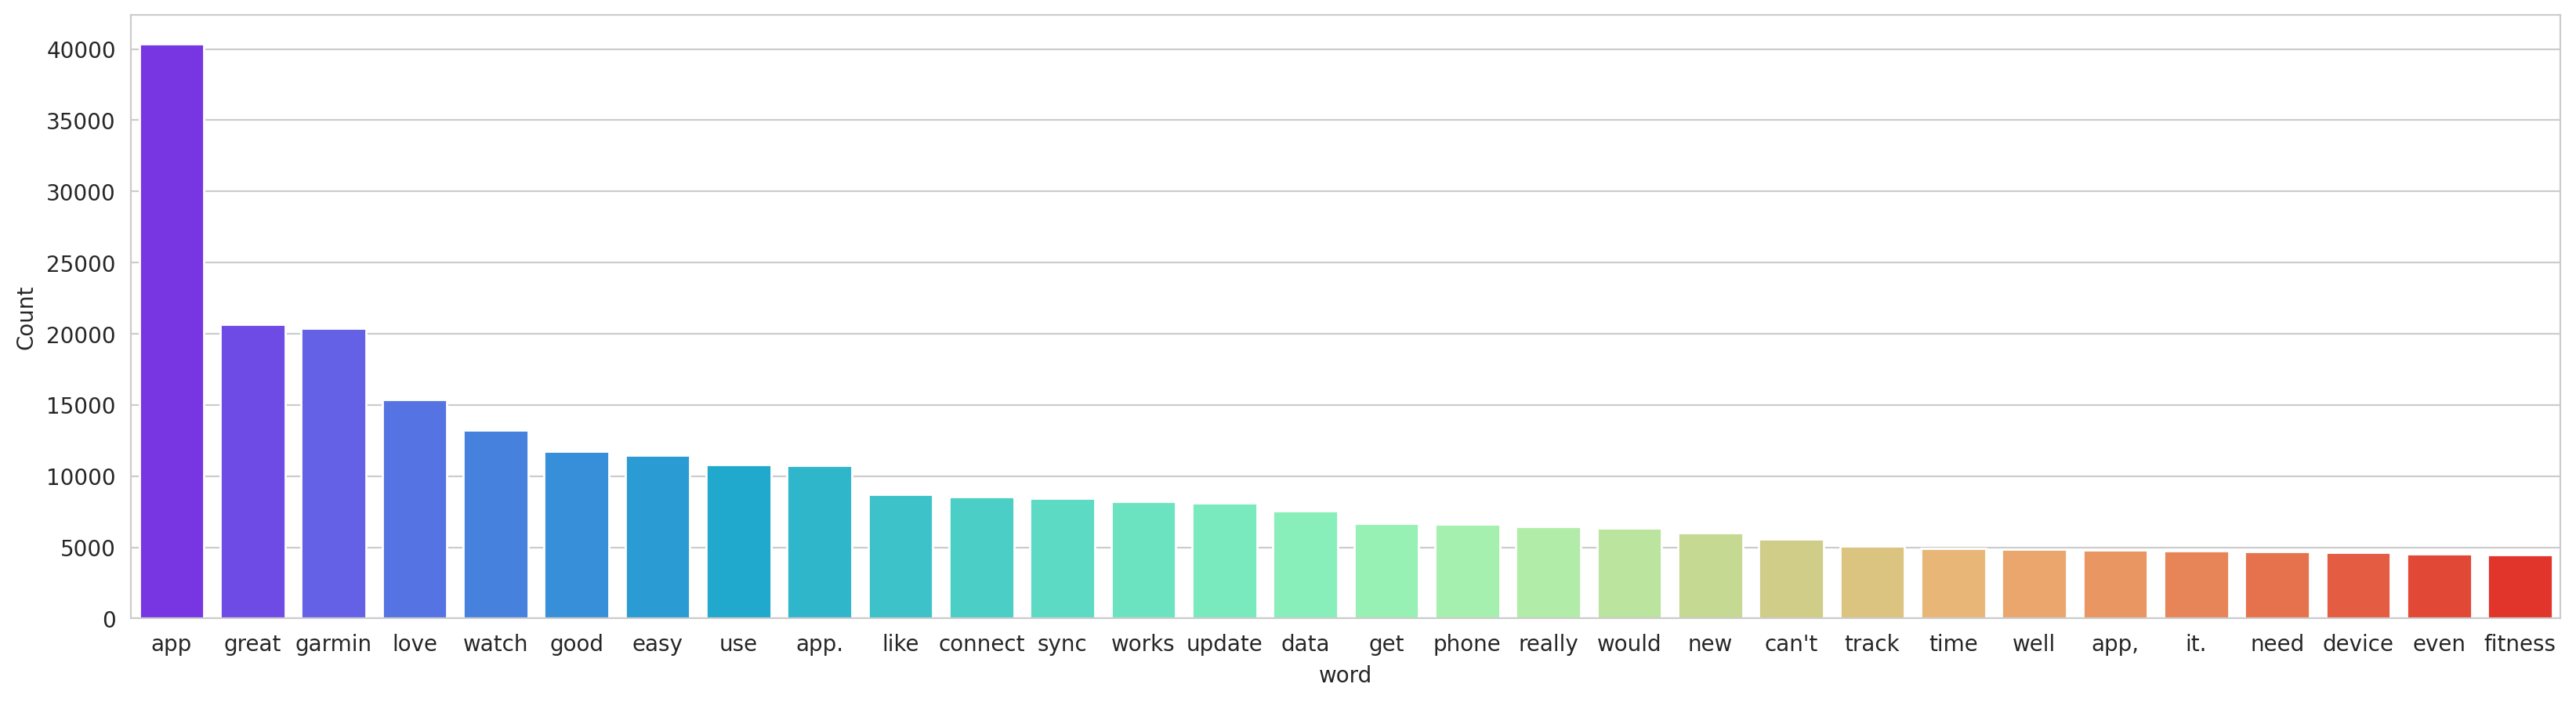

In [45]:
freq_words(garmin_connect_df['content'])

In [46]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
garmin_connect_df['content'] = garmin_connect_df['content'].apply(lambda x: stopword_remover.remove(x))


In [47]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_jknrev is your DataFrame and 'content' is the column
garmin_connect_df['content'] = garmin_connect_df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
garmin_connect_df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,"using app runs, hikes, bike rides since 2023, really easy use read results, great futures, accurate, far good.",5,0.486667,0.763333,Positive
1,one best comprehensive app fitness.,5,1.000000,0.300000,Positive
2,"everything need activity tracker, more. love it!",5,0.562500,0.550000,Positive
3,"accurate , reliable , easy use",5,0.416667,0.733333,Positive
4,needs mobile widgets,3,0.000000,0.000000,Neutral
...,...,...,...,...,...
125759,edge 810 works well pair either htc samsung nexus. 810 promptly shut (crash). sure that's unit problem garmin connect app. update: wrote garmin support advised factory reset edge device working mu...,4,0.500000,0.694444,Positive
125760,"soon launch connect phone, 810 turns off. happen connect running. worked first time though since.",2,0.250000,0.333333,Negative
125761,power data cycling!!!!,2,0.000000,0.000000,Negative
125762,"can't seem send prepared course (on garmin connect website), phone android device. ipad fine, there'snot even menu element it.",2,0.416667,0.500000,Negative


In [49]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-49-6f9223a4813b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


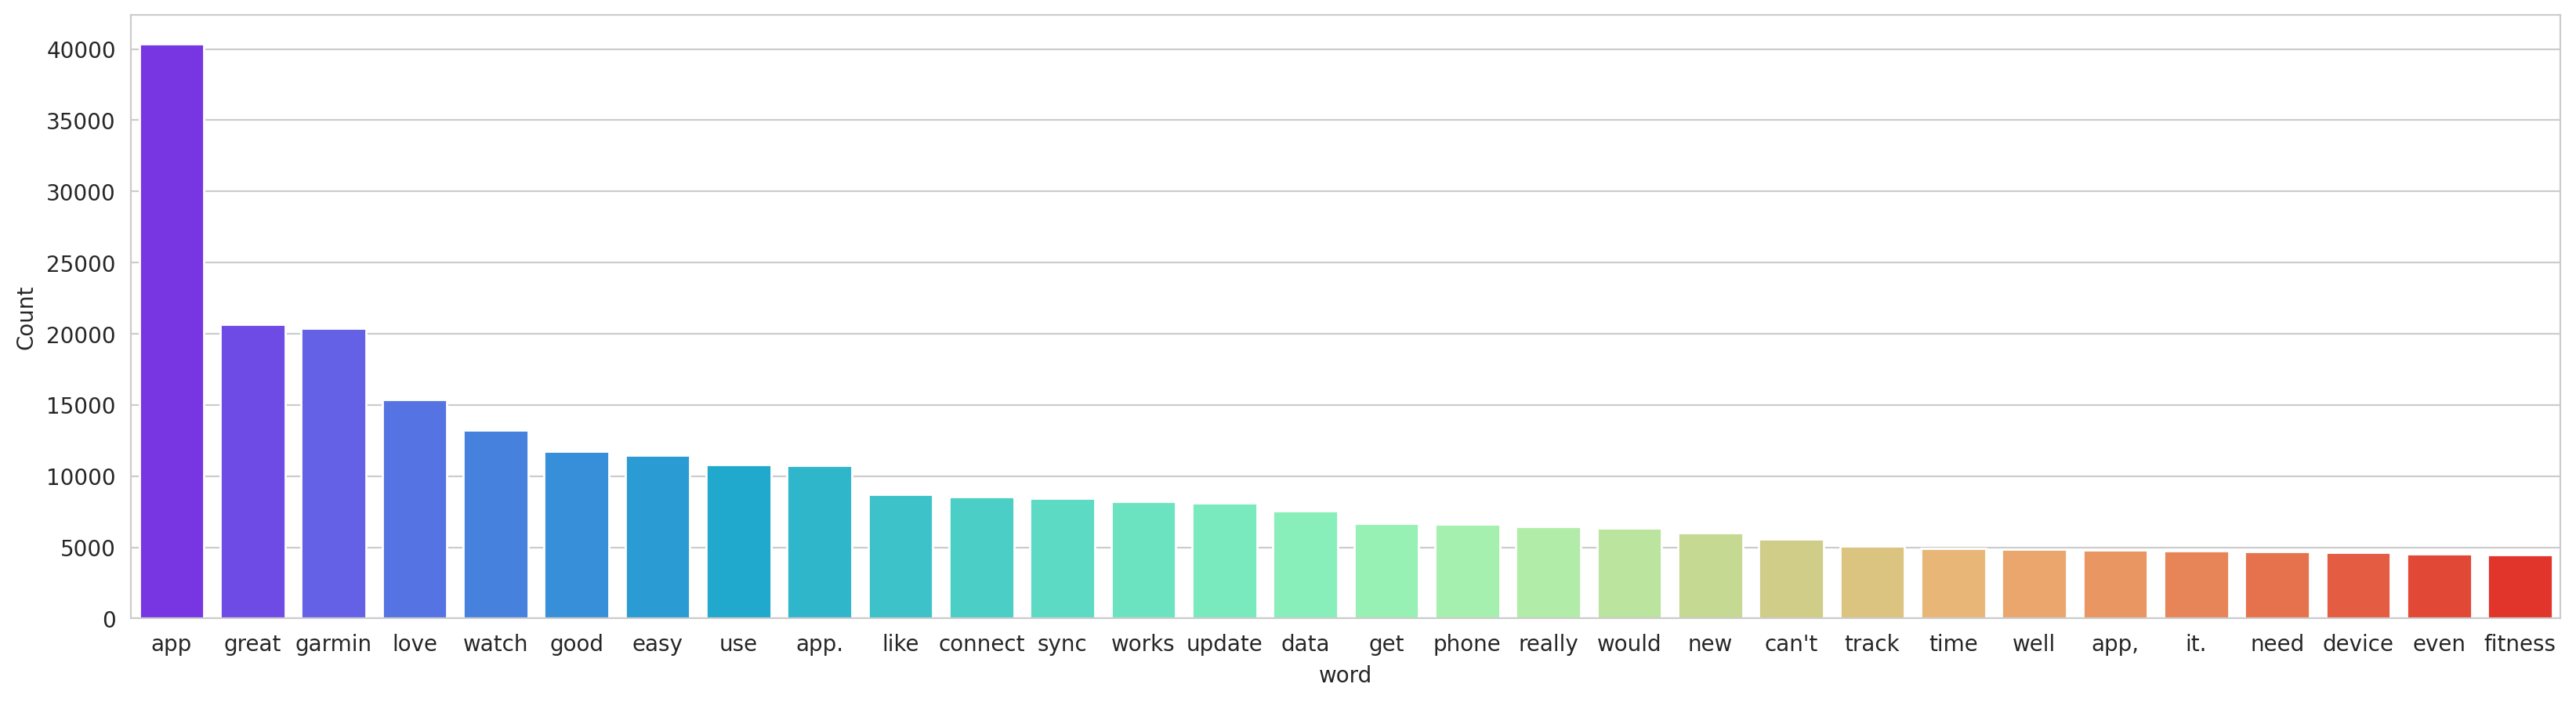

In [50]:
freq_words(garmin_connect_df['content'])

In [51]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_jknrev_stopwords['wordCount'] = [len(review.split()) for review in df_jknrev_stopwords['content']]
df_jknrev_stopwords['wordCount_after_stopwords'] = [len(review.split()) for review in df_jknrev_stopwords['review_after_stopwords']]


NameError: name 'garmin_connect_stopwords_df' is not defined

## Homework TUGAS 1A

NLP Pipeline:
Tokenization
Lowering
Stopword Removal
Lemmatization
Stemming
Punctuations Removal
Expand Contractions
Spelling Correction
Rare Words Removal
Common Words Removal
